## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston.
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset





## Задача 1

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston.

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

x = tf.random.uniform([3, 3])
print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))
print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))



есть ли доступные GPU: 
[]
тензор на GPU #0:  
False


val_relu_neuron10_SGD
val_relu_neuron80_SGD
val_relu_neuron150_SGD
val_relu_neuron10_Nadam
val_relu_neuron80_Nadam
val_relu_neuron150_Nadam
val_relu_neuron10_RMSprop
val_relu_neuron80_RMSprop
val_relu_neuron150_RMSprop
val_tanh_neuron10_SGD
val_tanh_neuron80_SGD
val_tanh_neuron150_SGD
val_tanh_neuron10_Nadam
val_tanh_neuron80_Nadam
val_tanh_neuron150_Nadam
val_tanh_neuron10_RMSprop
val_tanh_neuron80_RMSprop
val_tanh_neuron150_RMSprop
val_sigmoid_neuron10_SGD
val_sigmoid_neuron80_SGD
val_sigmoid_neuron150_SGD
val_sigmoid_neuron10_Nadam
val_sigmoid_neuron80_Nadam
val_sigmoid_neuron150_Nadam
val_sigmoid_neuron10_RMSprop
val_sigmoid_neuron80_RMSprop
val_sigmoid_neuron150_RMSprop
val_gelu_neuron10_SGD
val_gelu_neuron80_SGD
val_gelu_neuron150_SGD
val_gelu_neuron10_Nadam
val_gelu_neuron80_Nadam
val_gelu_neuron150_Nadam
val_gelu_neuron10_RMSprop
val_gelu_neuron80_RMSprop
val_gelu_neuron150_RMSprop


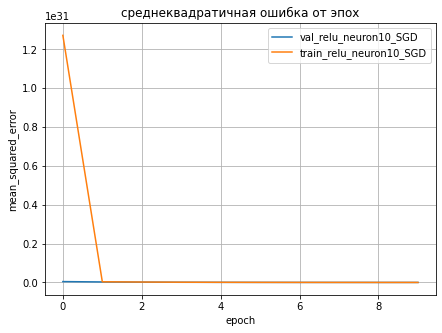

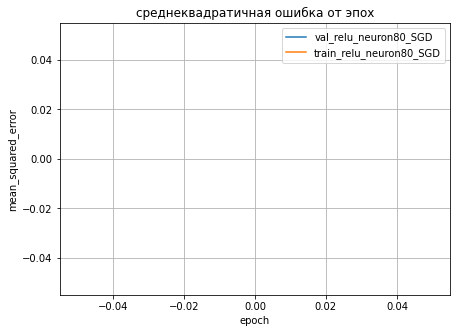

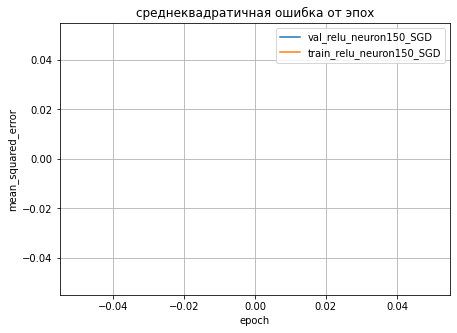

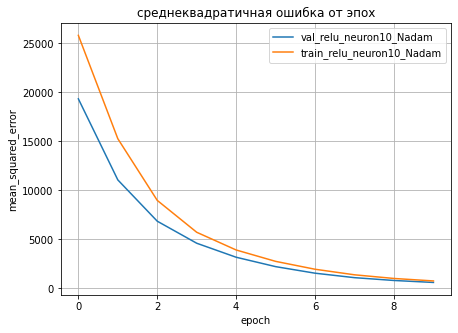

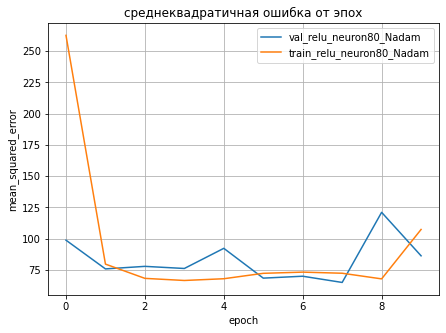

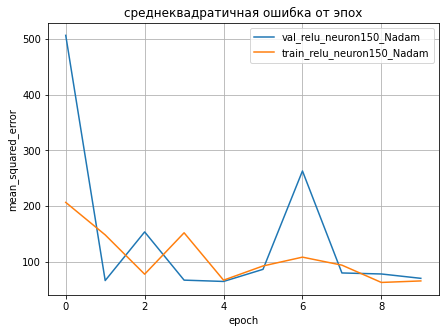

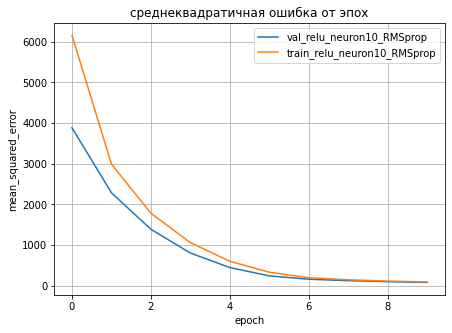

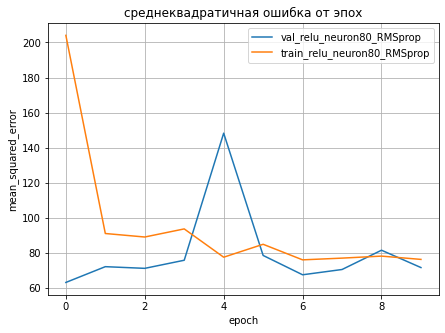

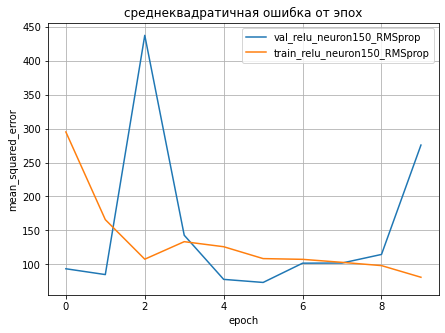

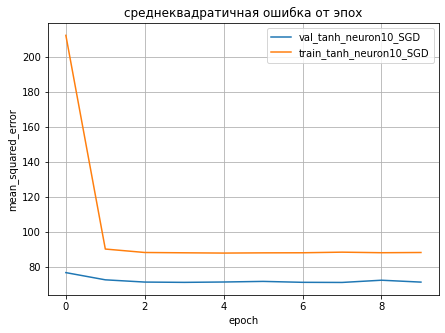

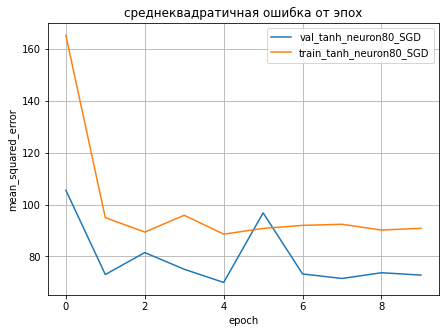

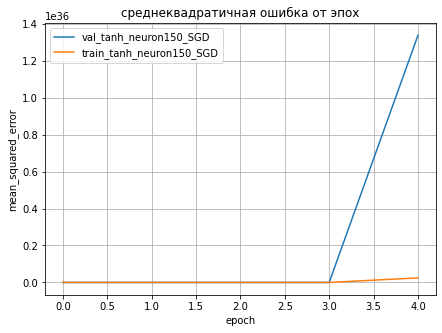

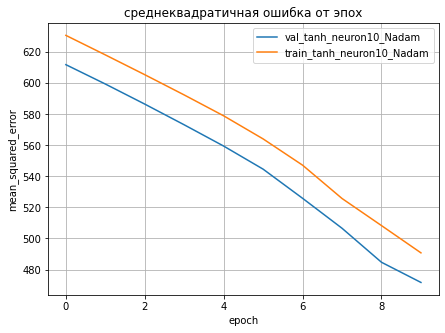

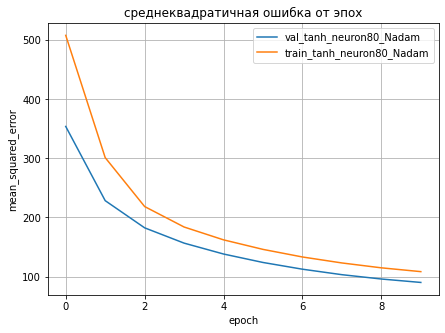

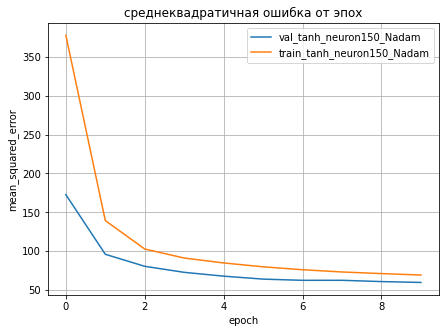

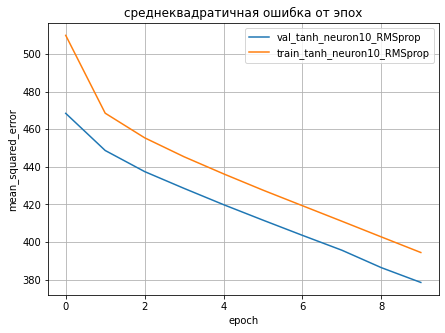

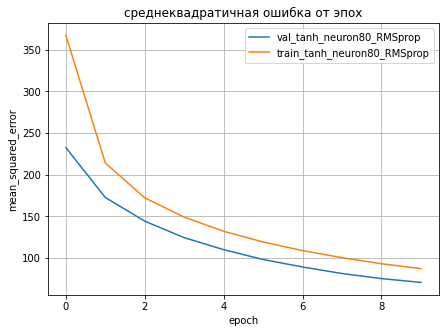

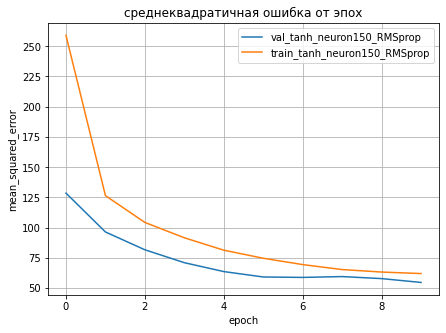

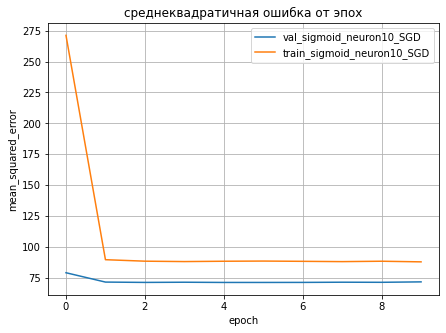

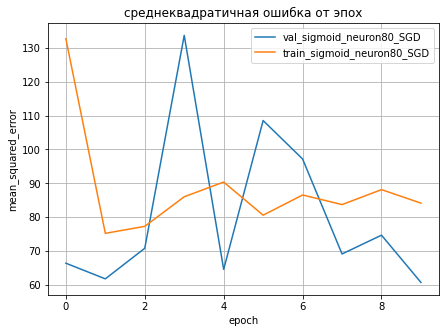

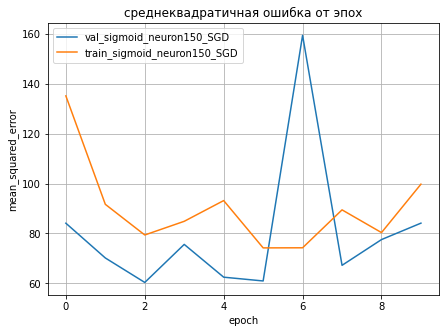

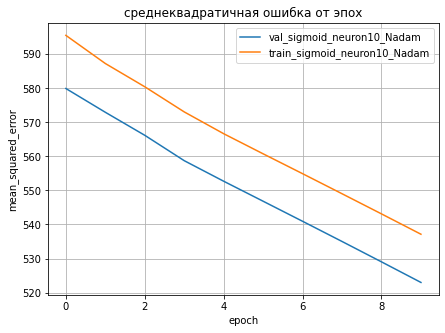

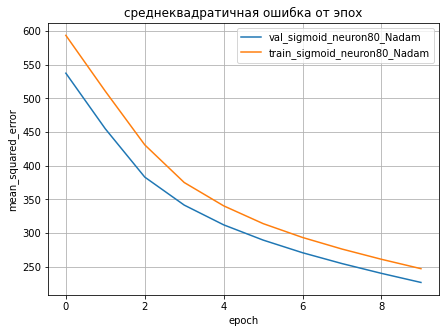

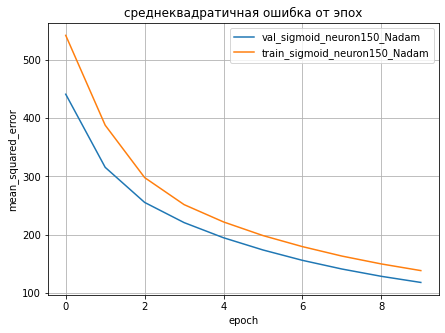

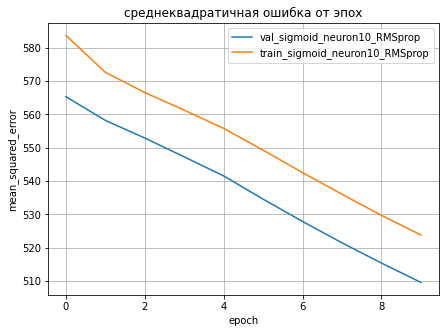

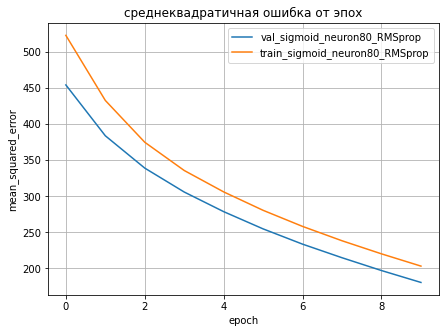

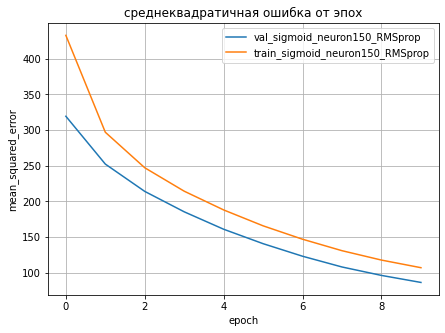

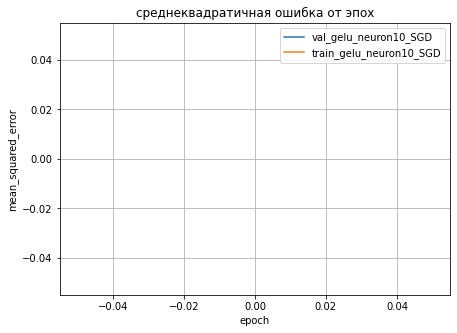

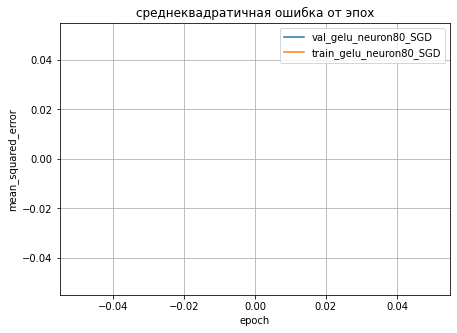

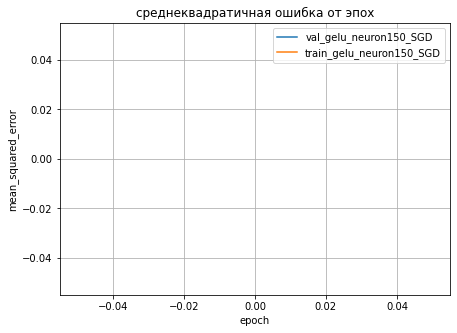

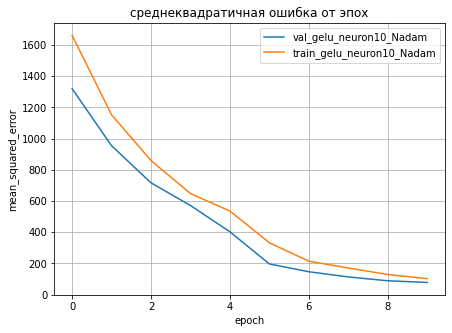

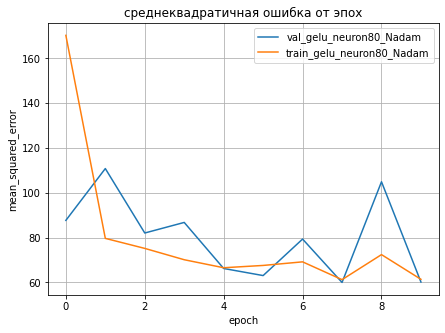

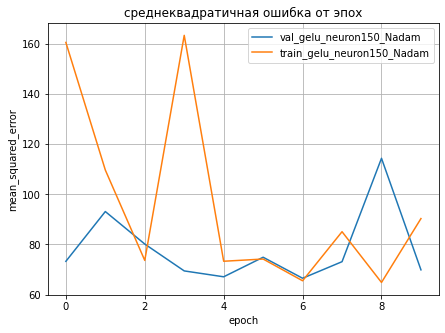

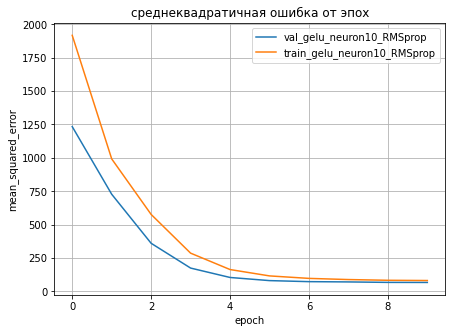

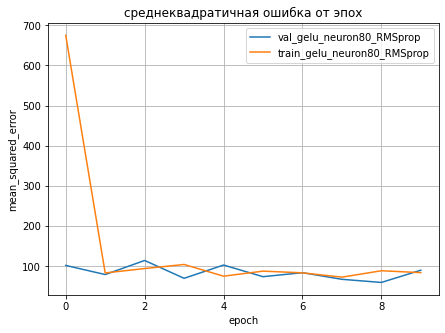

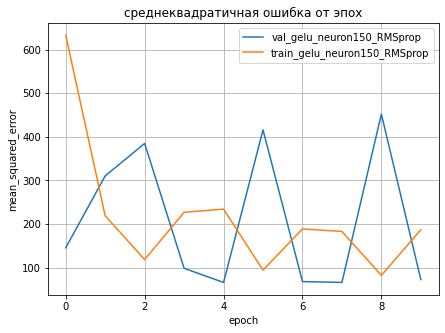

In [41]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
df_out_info = pd.DataFrame(columns=['activation', 'optimiser', 'neuron_count', 'last_metrics_train', 'last_metrics_test'])
for act in ['relu', 'tanh', 'sigmoid', 'gelu']:
    for opt in ['SGD', 'Nadam', 'RMSprop']:
        for c_neuron in range(10,200,70):
            try:
                del boston_model
            except Exception:
                print('Can`t find boston_model model!')

            boston_model = tf.keras.models.Sequential([
                tf.keras.layers.Dense( train_x.shape[1], activation='relu', input_dim=train_x.shape[1]),
                tf.keras.layers.Dense(c_neuron, activation=act),
                tf.keras.layers.Dense(c_neuron, activation=act),
                tf.keras.layers.Dense(1, activation='linear') # Линейная активация
            ])

            boston_model.compile(optimizer=opt,
                                 loss=['mean_squared_error'],
                                 metrics=['mean_squared_error',],
                                 )

            bigger_history = boston_model.fit(
                train_x, train_y,
                epochs=10,
                batch_size=32,
                #validation_split=.2,
                validation_data=(test_x,test_y),
                verbose=0,
            )

            print(f'val_{act}_neuron{c_neuron}_{opt}')
            df_out_info = df_out_info.append({
                                                'activation' : act,
                                                'optimiser' : opt,
                                                'neuron_count' : c_neuron,
                                                'last_metrics_train' : round(bigger_history.history['mean_squared_error'][-1],2),
                                                'last_metrics_test' : round(bigger_history.history['val_mean_squared_error'][-1],2)}
            , ignore_index=True)
            plt.figure(figsize=(7,5))
            plt.plot(bigger_history.history['val_mean_squared_error'] ,label=f'val_{act}_neuron{c_neuron}_{opt}')
            plt.plot(bigger_history.history['mean_squared_error'] ,label=f'train_{act}_neuron{c_neuron}_{opt}')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('mean_squared_error')
            plt.title('среднеквадратичная ошибка от эпох')
            plt.grid()
            plt.show()


In [42]:
print (df_out_info)

#Судя по сведённым данныхм в таблицу, и графикам обучения по метрике mean_squared_error:
# при максимальном количестве нейронов 150 в слое получили лучший результат при активации tanh и Nadam.
# Количество эпох посл 8 уже не сильно влияет на улучшение результата.

# Хочу отметить очень интересно влияет алгоритм актвации SIGMOID,
# практически на минимальном количестве нейронов в слое (<20 )
# падение ошибки на любом оптимизаторе выглядет линейно...
# как только количество нейронов увеличивается ошибка начинает падать по экспоненте.

   activation optimiser neuron_count  last_metrics_train  last_metrics_test
0        relu       SGD           10        5.322170e+26       3.939307e+26
1        relu       SGD           80                 NaN                NaN
2        relu       SGD          150                 NaN                NaN
3        relu     Nadam           10        7.658900e+02       6.123200e+02
4        relu     Nadam           80        1.072700e+02       8.618000e+01
5        relu     Nadam          150        6.509000e+01       6.975000e+01
6        relu   RMSprop           10        9.170000e+01       7.963000e+01
7        relu   RMSprop           80        7.640000e+01       7.175000e+01
8        relu   RMSprop          150        8.090000e+01       2.757800e+02
9        tanh       SGD           10        8.833000e+01       7.142000e+01
10       tanh       SGD           80        9.086000e+01       7.280000e+01
11       tanh       SGD          150                 NaN                NaN
12       tan

##Задача 2
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
(выводы по улучшению точности я сделал выше)
Нормальная метрика для этой задачи однозначно MSE


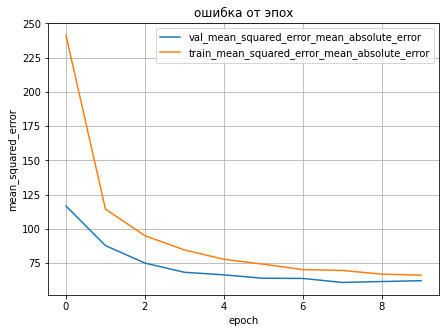

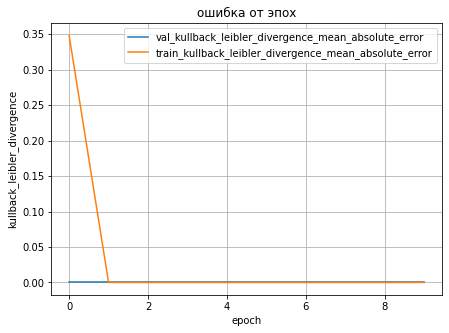

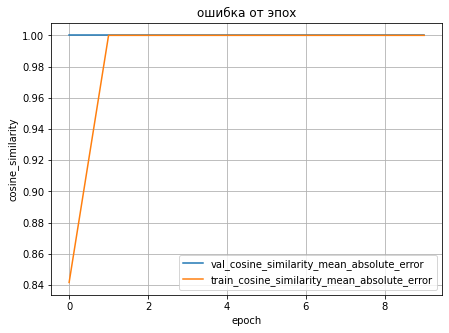

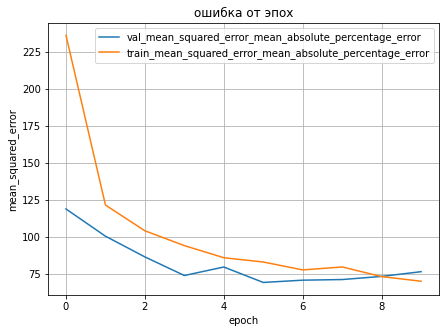

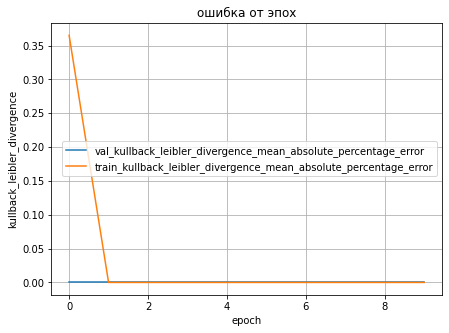

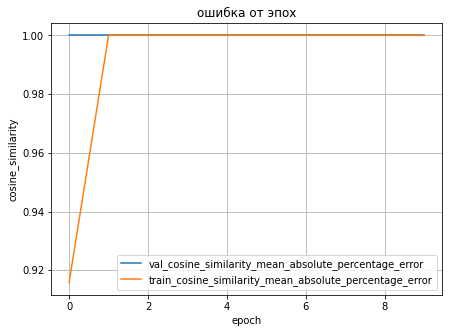

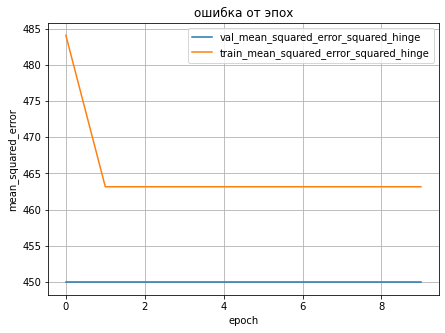

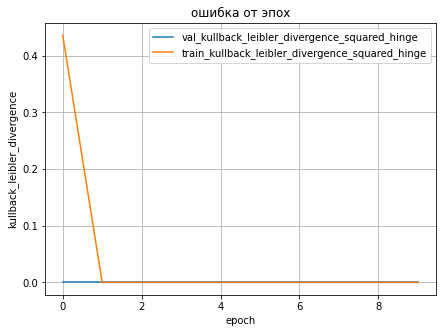

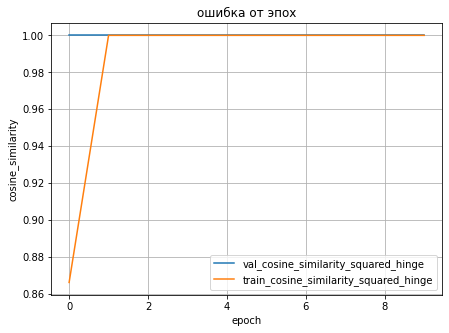

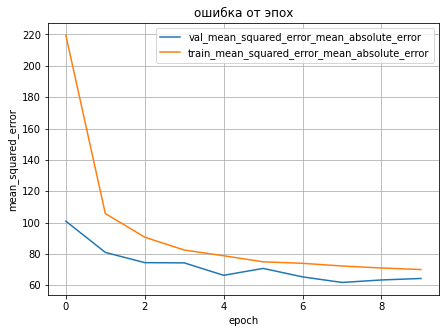

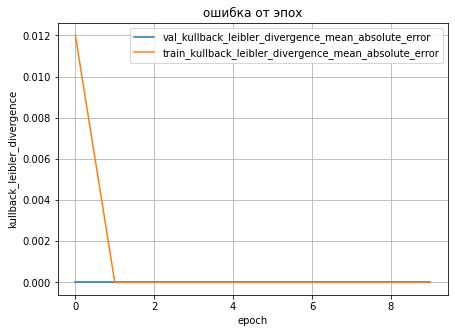

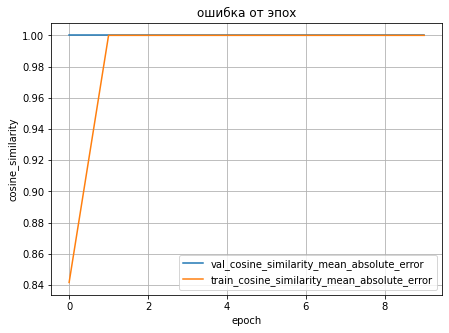

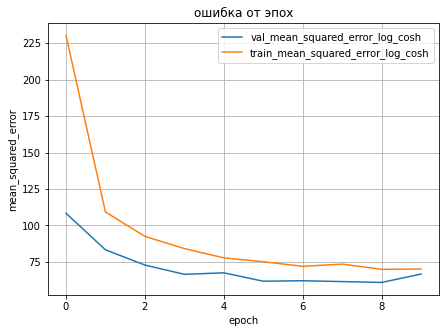

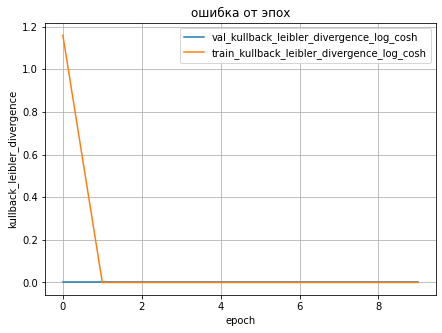

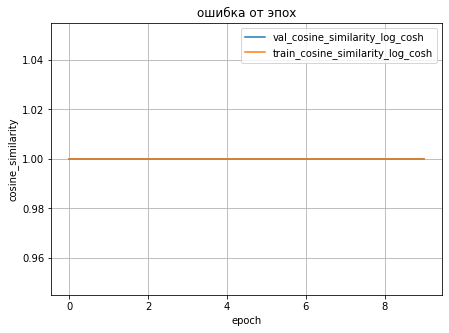

In [43]:
df_out_info = pd.DataFrame(columns=['metrics', 'loss', 'last_metrics_train', 'last_metrics_test'])
for loss in [
                tf.keras.losses.MeanAbsoluteError(),
                tf.keras.losses.MeanAbsolutePercentageError(),
                tf.keras.losses.SquaredHinge(),
                tf.keras.losses.MeanAbsoluteError(),
                tf.keras.losses.LogCosh(),]:
    for metric in [tf.keras.metrics.MeanSquaredError(),
                   tf.keras.metrics.KLDivergence(),
                   tf.keras.metrics.CosineSimilarity(),]:
        try:
            del boston_model
        except Exception:
            print('Can`t find model!')


        boston_model = tf.keras.models.Sequential([
                        tf.keras.layers.Dense( train_x.shape[1], activation='relu', input_dim=train_x.shape[1]),
                        tf.keras.layers.Dense(150, activation='tanh'),
                        tf.keras.layers.Dense(150, activation='tanh'),
                        tf.keras.layers.Dense(1, activation='linear') # Линейная активация
                    ])

        boston_model.compile(optimizer=opt,
                             loss=[loss],
                             metrics=[metric],
                             )

        bigger_history = boston_model.fit(
            train_x, train_y,
            epochs=10,
            batch_size=32,
            #validation_split=.2,
            validation_data=(test_x,test_y),
            verbose=0,
        )
        df_out_info = df_out_info.append({
                                                'metrics' : metric.name,
                                                'loss' : loss.name,
                                                'last_metrics_train' : round(bigger_history.history[metric.name][-1],2),
                                                'last_metrics_test' : round(bigger_history.history[f'val_{metric.name}'][-1],2)}
            , ignore_index=True)

        plt.figure(figsize=(7,5))
        plt.plot(bigger_history.history[f'val_{metric.name}'] ,label=f'val_{metric.name}_{loss.name}')
        plt.plot(bigger_history.history[metric.name] ,label=f'train_{metric.name}_{loss.name}')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel(metric.name)
        plt.title('ошибка от эпох')
        plt.grid()
        plt.show()

In [44]:
print(df_out_info)



                        metrics                            loss  \
0            mean_squared_error             mean_absolute_error   
1   kullback_leibler_divergence             mean_absolute_error   
2             cosine_similarity             mean_absolute_error   
3            mean_squared_error  mean_absolute_percentage_error   
4   kullback_leibler_divergence  mean_absolute_percentage_error   
5             cosine_similarity  mean_absolute_percentage_error   
6            mean_squared_error                   squared_hinge   
7   kullback_leibler_divergence                   squared_hinge   
8             cosine_similarity                   squared_hinge   
9            mean_squared_error             mean_absolute_error   
10  kullback_leibler_divergence             mean_absolute_error   
11            cosine_similarity             mean_absolute_error   
12           mean_squared_error                        log_cosh   
13  kullback_leibler_divergence                        log_cos

##Задача 3

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [45]:
tf.split
#Везде где идёт работа с данными, всегда нужно сливать/разделять(использовать пока не пробовал)

tf.unique


<function tensorflow.python.ops.array_ops.split(value, num_or_size_splits, axis=0, num=None, name='split')>